# CSCI-UA 0473 - Introduction to Machine Learning
## Monday, March 25, 2019

In this part of the HW you need to implement PCA of the 20newsgroups dataset.

You can use TFIDF as a feature extractor for you examples. Make is as simple as possible from the feature extraction perspective (simple extraction is already done for you here).

You can get 10 points max for this task. Your notebook should be *fully* reproducible to get full points.

In [216]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

## 1. Data (0 points)

In [217]:
newsgroups_train = datasets.fetch_20newsgroups(subset='train', 
                                               categories=['comp.sys.mac.hardware', 'rec.motorcycles', 'sci.med', 'soc.religion.christian'])

In [218]:
tfidf_vectorizer = TfidfVectorizer(min_df=30)
X = tfidf_vectorizer.fit_transform(newsgroups_train.data)
y = newsgroups_train.target

## 2. PCA - Principal Components Analysis (5 points)

In [219]:
# PCA finds projection that minimizes reconstruction error
# <TODO> import proper class
# import XYZ
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.decomposition import PCA

from scipy import linalg
from scipy.sparse import diags
from scipy.sparse import csr_matrix
import scipy.optimize

import autograd
from autograd import grad
import autograd.numpy as numpy
import autograd.numpy.random as npr

%matplotlib inline

def normalize(data):
    mean = np.mean(data, axis=1)[:,None]
    return data - mean

In [220]:
# <TODO> uncomment below. Choose q
q = 4  # our reduced dimension

In [221]:
# <TODO> uncomment below. initialize PCA model
# pca = dosomething
pca = PCA(n_components=q)

In [222]:
Z = pca.fit_transform(X.toarray())

In [225]:
# <TODO> uncomment below. retrieve explained variance ratio
var_ratio = pca.explained_variance_ratio_

In [226]:
print ('Ratio of variance explained: ', var_ratio)

Ratio of variance explained:  [0.03080441 0.01712901 0.01155376 0.00999027]


In [227]:
print ('Original Shape: ', X.shape)
print ('Reduced Shape: ', Z.shape)

Original Shape:  (2369, 1771)
Reduced Shape:  (2369, 4)


## 3. Visualizing the reduced data points (2 points)

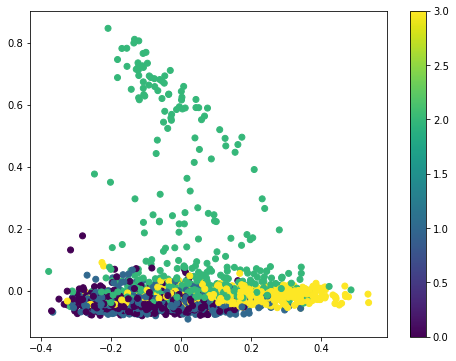

In [228]:
plt.figure(figsize=(8, 6))
plt.scatter(Z[:, 0], Z[:, 1], c = y)
plt.colorbar()

## 4. Analysis (3 points)

In [229]:
# <TODO> uncomment below. Retrieve W
W = pca.components_


In [230]:
invocab = dict([(vv,kk) for kk, vv in tfidf_vectorizer.vocabulary_.items()])

for i in range(q):
    insens_idx = np.argsort(W[i])

    print ('TOPIC ' + str(i))
    print (' '.join([invocab[w_ix] for w_ix in insens_idx[-10:]]) + '\n')

TOPIC 0
not we in god is and to that of the

TOPIC 1
n3jxp chastity shameful cadre dsl cs gordon banks geb pitt

TOPIC 2
not hell christians faith that his jesus he we god

TOPIC 3
uga georgia apple god ai university of mac edu the

